# Data Visualization

In [2]:
import numpy as np
import pandas as pd
import os
import re
import string
import nltk 
nltk.download("wordnet")      # corpus diye bir kalsore indiriliyor
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected =True)
import plotly.graph_objs as go
from plotly import tools

[nltk_data] Downloading package wordnet to /Users/jliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Cleaning

In [2]:
fifa_df = pd.read_csv('./data/FIFA.csv') # encoding = 'latin1'
fifa_df.Tweet=fifa_df.Tweet.astype(str)
display(fifa_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                530000 non-null  int64 
 1   lang              530000 non-null  object
 2   Date              530000 non-null  object
 3   Source            530000 non-null  object
 4   len               530000 non-null  int64 
 5   Orig_Tweet        530000 non-null  object
 6   Tweet             530000 non-null  object
 7   Likes             530000 non-null  int64 
 8   RTs               530000 non-null  int64 
 9   Hashtags          468457 non-null  object
 10  UserMentionNames  455841 non-null  object
 11  UserMentionID     455841 non-null  object
 12  Name              529945 non-null  object
 13  Place             390710 non-null  object
 14  Followers         530000 non-null  int64 
 15  Friends           530000 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 

None

Deleting rows with tweets that are blank

In [3]:
fifa_df['Tweet'].replace('  ', np.nan, inplace=True)
fifa_df = fifa_df.dropna(subset=['Tweet'])
fifa_df.head(5)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216


Let's get some idea of the FIFA dataset

In [4]:
fifa_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,530000.0,1.015971e+18,2.292859e+15,1.012847e+18,1.013528e+18,1.016753e+18,1.018551e+18,1.018635e+18
len,530000.0,1.221631e+02,3.513749e+01,8.000000e+00,1.000000e+02,1.350000e+02,1.400000e+02,8.860000e+02
Likes,530000.0,1.162715e+00,6.713132e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.704200e+04
RTs,530000.0,4.652635e+03,1.303001e+04,0.000000e+00,1.000000e+01,3.020000e+02,2.312000e+03,9.674600e+04
Followers,530000.0,1.185474e+04,3.067313e+05,0.000000e+00,1.270000e+02,3.600000e+02,9.780000e+02,4.067431e+07
Friends,530000.0,1.150241e+03,6.099937e+03,0.000000e+00,1.890000e+02,4.170000e+02,9.360000e+02,5.399610e+05


In [5]:
fifa_df.columns

Index(['ID', 'lang', 'Date', 'Source', 'len', 'Orig_Tweet', 'Tweet', 'Likes',
       'RTs', 'Hashtags', 'UserMentionNames', 'UserMentionID', 'Name', 'Place',
       'Followers', 'Friends'],
      dtype='object')

In [6]:
fifa_df = fifa_df[~(fifa_df == 0).any(axis=1)]
fifa_df_ = fifa_df[["Tweet", "Likes", "Followers"]]
fifa_df_

,Tweet,Likes,Followers
191,Lebron news is cool and all pero let gets back...,21,123087
245,It not the day David De Gea want to remember a...,4,1250993
346,Watch tomorrow action with at am pm,4,389785
383,Idek what to do anymore Spain and Portugal bot...,13,31407
468,We got power power,1,1
...,...,...,...
528148,Jose Mourinho think Croatia France since the b...,15,107253
528450,Celebrations after the in the dressing room of...,24,3070
528845,Hi did an incrrdible feat rose from the bracke...,1,1286
529215,Another one in the bag this year Mendy Champion,78,34199


In [3]:
complete_df = pd.read_csv('./data/CompleteDataset.csv')
complete_df.head(5)

/Users/jliu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's get some idea of the Complete dataset

In [39]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [40]:
complete_df_cols = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing','Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 'Short passing', 'Long passing','Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle','Strength', 'Vision', 'Acceleration', 'Agility', 'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 'Sprint speed', 'Positioning','Preferred Positions']
complete_df2 = complete_df[complete_df_cols]
complete_df2.head()


,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63,85,81,91,94,76,88,92,85,94,...,89,96,92,63,93,95,95,91,95,ST LW
1,48,77,89,97,95,90,71,88,74,85,...,90,95,73,95,95,96,68,87,93,RW
2,56,75,81,96,89,84,62,77,81,80,...,96,88,78,82,95,92,61,90,90,LW
3,78,77,86,86,94,84,77,86,85,87,...,86,93,89,60,91,83,69,77,92,ST
4,29,15,14,30,13,11,25,16,47,25,...,52,85,44,35,48,70,78,61,12,GK


In [41]:
positions = complete_df2['Preferred Positions'].str.split().apply(lambda x: x[0]).unique()
display(positions)

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

In [4]:
complete_df3 = complete_df
complete_df3['array'] = complete_df3['Unnamed: 0']+1

complete_df_cols2 = ['array','Name','Age','Nationality','Overall','Potential','Club','Value',
                      'Wage','Special','Acceleration','Ball control','Dribbling','Free kick accuracy',
                      'Penalties','Shot power']
complete_df3 = complete_df[complete_df_cols2]
display(complete_df3.head(3))
display(complete_df3.tail(3))

,array,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Ball control,Dribbling,Free kick accuracy,Penalties,Shot power
0,1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,93,91,76,85,94
1,2,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,95,97,90,74,85
2,3,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,95,96,84,81,80


,array,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Ball control,Dribbling,Free kick accuracy,Penalties,Shot power
17978,17979,J. Young,17,Scotland,46,61,Swindon Town,€60K,€1K,1194,66,41,37,25,58,42
17979,17980,J. Lundstram,18,England,46,64,Crewe Alexandra,€60K,€1K,1302,57,43,41,34,43,43
17980,17981,L. Sackey,18,Ghana,46,64,Scunthorpe United,€50K,€1K,1031,48,32,23,17,21,21


Before working the values (Value and Wage), we need to convert it to readable number.

In [5]:
complete_df4 = complete_df3.sort_values(by=['Value'], ascending=False)
complete_df4
display(complete_df4.head(5))
display(complete_df4.tail(5))

,array,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Ball control,Dribbling,Free kick accuracy,Penalties,Shot power
1166,1167,Rafael Tolói,26,Brazil,77,80,Atalanta,€9M,€28K,1792,63,62,55,70,64,75
1495,1496,F. Niederlechner,26,Germany,76,77,SC Freiburg,€9M,€31K,1834,72,68,71,44,66,81
1572,1573,R. Ruidíaz,26,Peru,76,77,Monarcas Morelia,€9M,€16K,1857,79,74,76,69,67,76
1551,1552,J. Gómez,23,Argentina,76,82,Club Atlético Lanús,€9M,€16K,1910,93,71,72,35,45,64
823,824,C. Gentner,31,Germany,78,78,VfB Stuttgart,€9M,€29K,2019,48,77,70,54,65,79


,array,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Ball control,Dribbling,Free kick accuracy,Penalties,Shot power
4798,4799,L. Caicedo,25,Ecuador,71,76,NaN,€0,€0,1436,59,33,23,26,37,37
944,945,B. Dočkal,28,Czech Republic,77,77,NaN,€0,€0,1964,68,79,77,80,75,78
16703,16704,D. Wynne,22,New Zealand,55,66,NaN,€0,€0,1382,79,45,58,32,41,23
925,926,B. Moukandjo,28,Cameroon,77,77,NaN,€0,€0,1904,90,75,79,71,79,78
16190,16191,T. Williams,33,New Zealand,57,57,NaN,€0,€0,1025,52,16,12,15,17,12


In [15]:
complete_df3.Value = complete_df3.Value.map(lambda x: x.replace("€", ""))
complete_df3.Value = (complete_df3.Value.replace(r'[KM]+$', '', regex=True).astype(float) * complete_df3.Value.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

/Users/jliu/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
complete_df3.Wage = complete_df3.Wage.map(lambda x: x.replace("€", ""))
complete_df3.Wage = (complete_df3.Wage.replace(r'[KM]+$', '', regex=True).astype(float) * complete_df3.Wage.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [17]:
complete_df3

,array,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Ball control,Dribbling,Free kick accuracy,Penalties,Shot power
0,1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89,93,91,76,85,94
1,2,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154,92,95,97,90,74,85
2,3,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100,94,95,96,84,81,80
3,4,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291,88,91,86,84,85,87
4,5,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493,58,48,30,11,47,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17977,A. Kelsey,17,England,46,63,Scunthorpe United,50000.0,1000.0,755,24,12,12,12,17,19
17977,17978,B. Richardson,47,England,46,46,Wycombe Wanderers,0.0,1000.0,832,25,22,11,11,22,13
17978,17979,J. Young,17,Scotland,46,61,Swindon Town,60000.0,1000.0,1194,66,41,37,25,58,42
17979,17980,J. Lundstram,18,England,46,64,Crewe Alexandra,60000.0,1000.0,1302,57,43,41,34,43,43


## Natural language Analytics

### Tokenize data

In [7]:
# stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
comment_words = ' '
stopwords = set(STOPWORDS)

In [8]:
def stem_tokenize(tokens, stemmer):
    stemmed_list = []
    for t in tokens:
        stemmed_list.append(stemmer.stem(t))
    return stemmed_list

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    token_sanitize = re.sub("[^a-zA-Z]+","", str(tokens))
    stems = stem_tokenize(token_sanitize , stemmer)
    stems = stem_tokenize(tokens , stemmer)
    return ' '.join(stems)

# stopwords = set(stopwords.words('english'))
def clean_text(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text]
    punct = str.maketrans('', '', string.punctuation) 
    text = [word.translate(punct) for word in text] 
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if not word in stopwords]
    return ''.join(text)

### Showing the most frequent use words

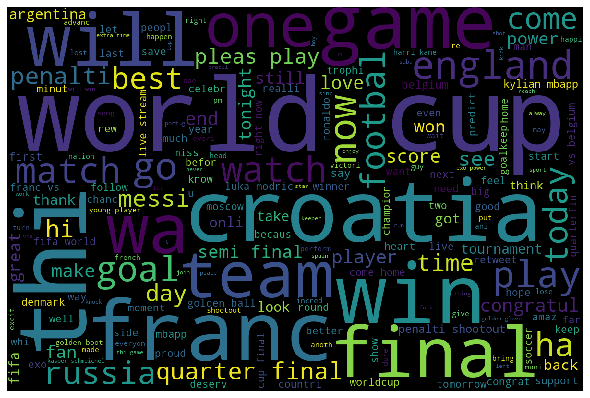

In [44]:
corpus = []
for tweet in fifa_df_['Tweet']:
    tweet = tweet.lower()
    tokens = tokenize(tweet)
    corpus.append(tokens)
    
for words in corpus:
    comment_words = comment_words + words + ' '
 
fifa_wordcloud = WordCloud(stopwords = stopwords, min_font_size = 10, width = 1200, height = 800).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(fifa_wordcloud)
plt.axis("off")
plt.savefig('fifa_wordcloud.png')
plt.tight_layout(pad = 0)
 
plt.show()

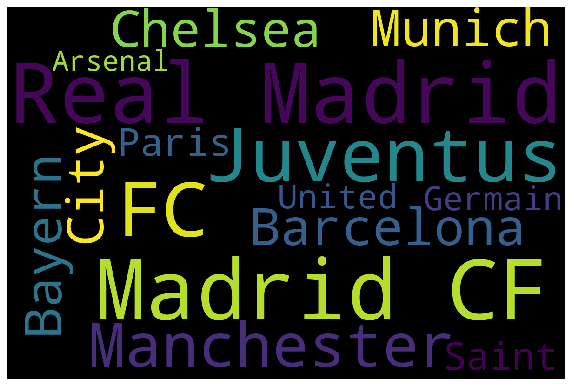

In [48]:
complete_d_frame = complete_df3.Club[:20]

plt.subplots(figsize=(10,10))
complete_wordcloud = WordCloud(width = 1200, height = 800).generate(" ".join(complete_d_frame))
plt.imshow(complete_wordcloud)
plt.axis('off')
plt.savefig('complete_wordcloud.png')

## Analyze the Source of tweets

In [10]:
fifa_df.Source.unique()

array(['Twitter for iPhone', 'Twitter Lite', 'Twitter for Android',
       'Twitter Web Client', 'TweetDeck', 'Mobile Web (M2)',
       'Flamingo for Android', 'dlvr.it', 'Twitter Ads Composer', 'IFTTT',
       'Media Studio', 'SnappyTV.com', 'SocialFlow', 'Sprinklr',
       'Vox Media', 'OS X', 'trueAnthem', 'Twitter for iPad', 'Echofon',
       'Hootsuite Inc.', 'Facebook', 'Instagram', 'Grabyo', 'Hootsuite',
       'Buffer', 'Falcon Social Media Management ', 'Spredfast app',
       'Roar TV Auto Tweet', 'MetaphorMirror', 'Periscope',
       'AgoraPulse Manager', 'Fort Russ News Service',
       'SmartNews | ????????', 'Echobox Social', 'WordPress.com',
       'BTV Client Library', 'HubSpot', 'Podiant integration',
       'Tweetbot for i?S', 'SocialNewsDesk', 'Google', 'IOL Tweeter',
       'Bad Kitty', 'Scoop.it', 'Tweetbot for Mac',
       'TweetCaster for Android', 'Crowdfire - Go Big', 'Sprout Social',
       'SMMplanner', 'Twibble.io', 'FourFourTwo Autoposter',
       'Twitter 

In [11]:
# Combine Apple system source (ipad and iphone)
fifa_df.loc[fifa_df['Source'] == 'Twitter for iPhone', 'Source'] = 'Twitter for ipad/iphone'
fifa_df.loc[fifa_df['Source'] == 'Twitter for iPad', 'Source'] = 'Twitter for ipad/iphone'
grp1 = fifa_df.groupby(["Source"]).size().reset_index(name='counts')
grp2 = grp1.sort_values('counts', ascending=False).reset_index(drop=True)
top3src = grp2.head(10)
top3src

,Source,counts
0,Twitter for Android,4052
1,Twitter for ipad/iphone,2731
2,Twitter Web Client,2035
3,TweetDeck,1012
4,Twitter Lite,285
5,Media Studio,158
6,SocialFlow,153
7,Hootsuite Inc.,106
8,SnappyTV.com,94
9,Buffer,67


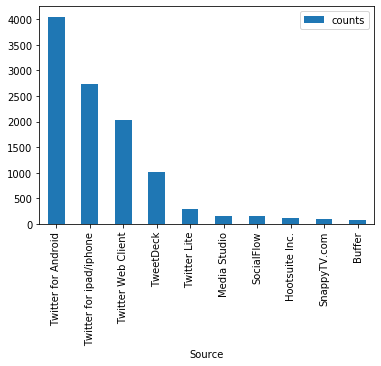

In [12]:
# Plot a bar chart by the top 10 source
top3src.plot(x="Source", y="counts", kind="bar")
plt.show()

## Analytize by Location

In [13]:
fifa_df_location = fifa_df.groupby('Place')['Name'].count().sort_values(ascending=False)
fifa_df_location.head(10)

Place
India              189
London             171
United Kingdom     167
London, England    165
Nigeria            129
South Africa       129
Lagos, Nigeria     126
Australia          107
United States       94
Nairobi, Kenya      91
Name: Name, dtype: int64

Players in same countries

In [4]:
complete_df3.groupby("Nationality").Name.count().sort_values(ascending=False).head(10)

Nationality
England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Name, dtype: int64

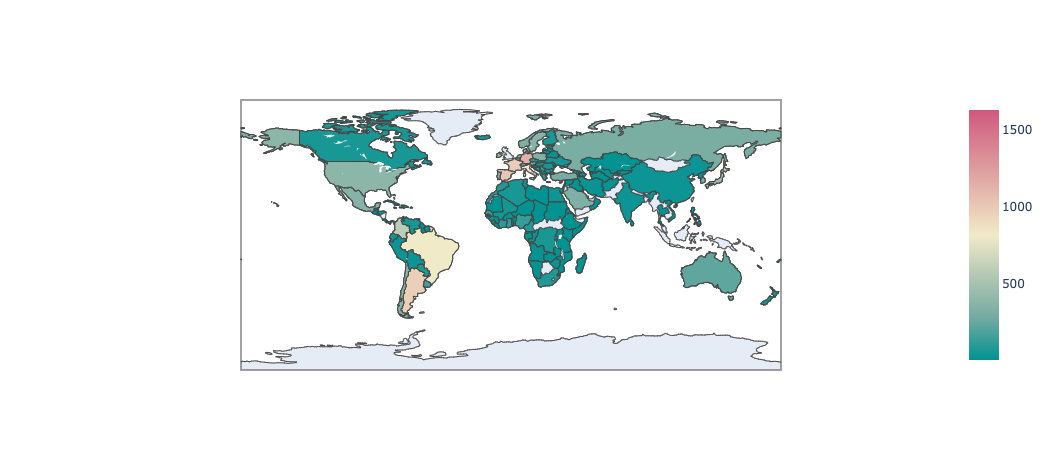

In [9]:
country_df = complete_df3['Nationality'].value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=country_df.index.values,
    text=country_df.index,
    z=country_df.values,
    colorscale= 'tealrose')])

## Age Distribution of players

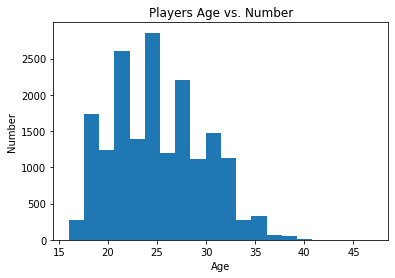

In [22]:
fig, ax = plt.subplots()
ax.hist(complete_df3['Age'], bins=20)
ax.set_xlabel('Age')
ax.set_ylabel('Number')
ax.set_title(r'Players Age vs. Number')
plt.show()

Let's consider the value of a player and if it's relevent to his age

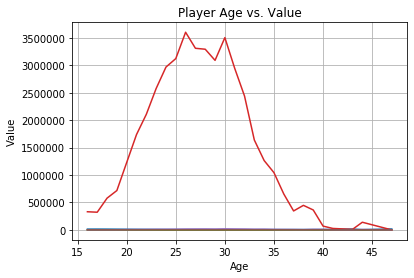

In [23]:
age_value = complete_df3.groupby('Age').mean()
fig, ax = plt.subplots()
ax.plot(age_value)
ax.set(xlabel='Age', ylabel='Value',title='Player Age vs. Value')
ax.grid()

fig.savefig("player_age_value.png")
plt.show()

### Age distribution of the players of the top 10 contries

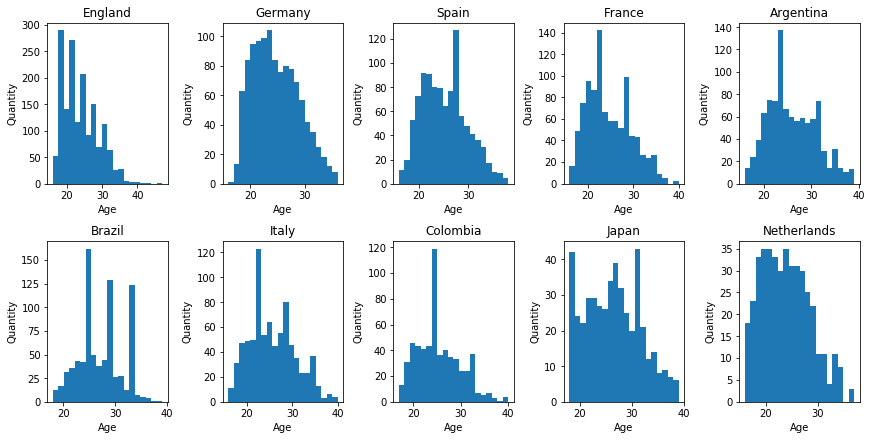

<Figure size 432x288 with 0 Axes>

In [19]:
players_df = pd.DataFrame(complete_df3.Nationality.value_counts()).reset_index().rename({'index': 'Country', 'Nationality': 'Players'}, axis=1)

def get_top10_country():
    for country in players_df[:10].Country.values:
        yield country

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12,6), constrained_layout=True)
player_country = get_top10_country()

for row, row_axes in enumerate(axes):
    for column, ax in enumerate(row_axes):
        country = next(player_country)
        ax.hist(complete_df3.query('Nationality == "{}"'.format(country)).Age, bins=20)
        ax.set_title('{}'.format(country))
        ax.set_xlabel('Age')
        ax.set_ylabel('Quantity')
        
plt.show() 
plt.savefig('players_age_top10_country.png')

## Analyze the salarys

### The top 10 paid team

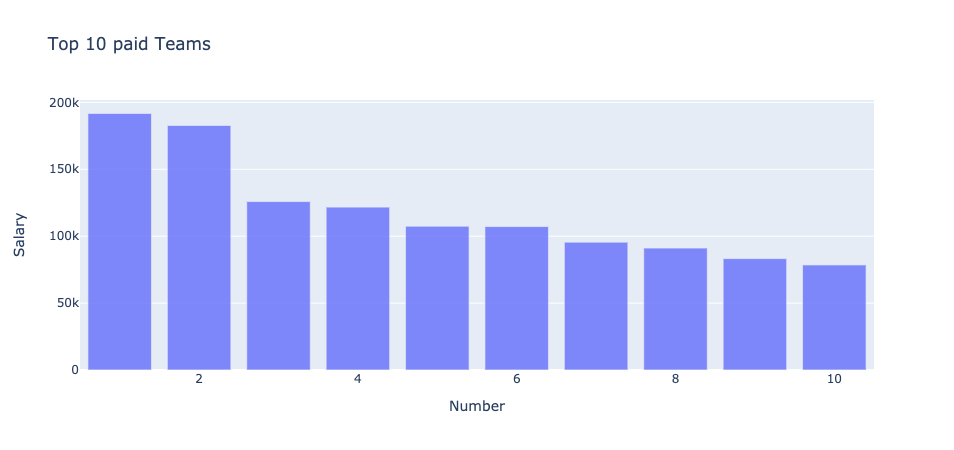

In [36]:
salary_team = complete_df3.groupby("Club")["Wage"].mean().sort_values(ascending=False)
salary_top10_team = salary_team.head(10)

salary_bar = go.Bar(
    text= complete_df3.Club,
    x= complete_df3.array,
    y= salary_top10_team,
    opacity = 0.8,)

data = [salary_bar]
layout = go.Layout(barmode='group',
                  title='Top 10 paid Teams',
                  xaxis= dict(title= 'Number'),
                  yaxis= dict(title='Salary'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Sentiment polarity 

In [14]:
# Apply clean text to tweet
fifa_df['clean_tweet'] = fifa_df['Tweet'].apply(clean_text)
fifa_df['clean_word_count'] = fifa_df['clean_tweet'].str.split().str.len()
fifa_df.head(5)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends,clean_tweet,clean_word_count
191,1013596623002308611,en,2018-07-02 01:34:01,Twitter for ipad/iphone,106,Lebron news is cool and all pero let’s gets ba...,Lebron news is cool and all pero let gets back...,21,3,WorldCup,NaN,NaN,LeJuan James,"Orlando, FL",123087,316,lebronnewscoolperoletgetsbackimportantletgomexico,1
245,1013596508883546112,en,2018-07-02 01:33:34,Twitter for ipad/iphone,156,It’s not the day David De Gea want to remember...,It not the day David De Gea want to remember a...,4,5,"mufc,worldcup",David De Gea,d_degeaofficial,United Indonesia,Indonesia,1250993,385,daydaviddegeawantrememberlostpenaltykickstillbest,1
346,1013596305627770881,en,2018-07-02 01:32:45,Twitter for ipad/iphone,169,#32Nations1City ??\r\n\r\nWatch tomorrow’s #Wo...,Watch tomorrow action with at am pm,4,1,"32Nations1City,WorldCup,NYCFC,BRAMEX,BELJPN","Telemundo Deportes,Rockefeller Center","TelemundoSports,rockcenternyc",New York City FC,New York City,389785,6290,watchtomorrowactionpm,1
383,1013596224887222275,en,2018-07-02 01:32:26,Twitter Lite,65,Idek what to do anymore. \r\nSpain and Portuga...,Idek what to do anymore Spain and Portugal bot...,13,1,WorldCup,NaN,NaN,Ella Laxa-Pangilinan,Manila/Firenze,31407,196,idekanymorespainportugal,1
468,1013596037561442304,en,2018-07-02 01:31:41,Twitter for Android,123,@FIFAWorldCup @weareoneEXO #PowerByEXO #WorldC...,We got power power,1,5,"PowerByEXO,WorldCup,FIFAStadiumDJ,ChenLeague","FIFA World Cup ?,EXO","FIFAWorldCup,weareoneEXO",Gabriela Lizeth Cano,"Altamira, Tamaulipas",1,91,gotpowerpower,1


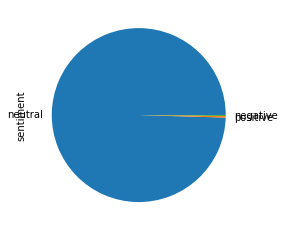

In [19]:
fifa_df['polarity'] = [round(TextBlob(word).sentiment.polarity, 2) for word in fifa_df['clean_tweet']]
fifa_df['sentiment'] = ['positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral' for polarity in fifa_df['polarity']]

# Sentiments
fifa_df.sentiment.value_counts().plot(kind='pie')

Now we know that most ofthe tweets are neutral sentiment.

### Prediction

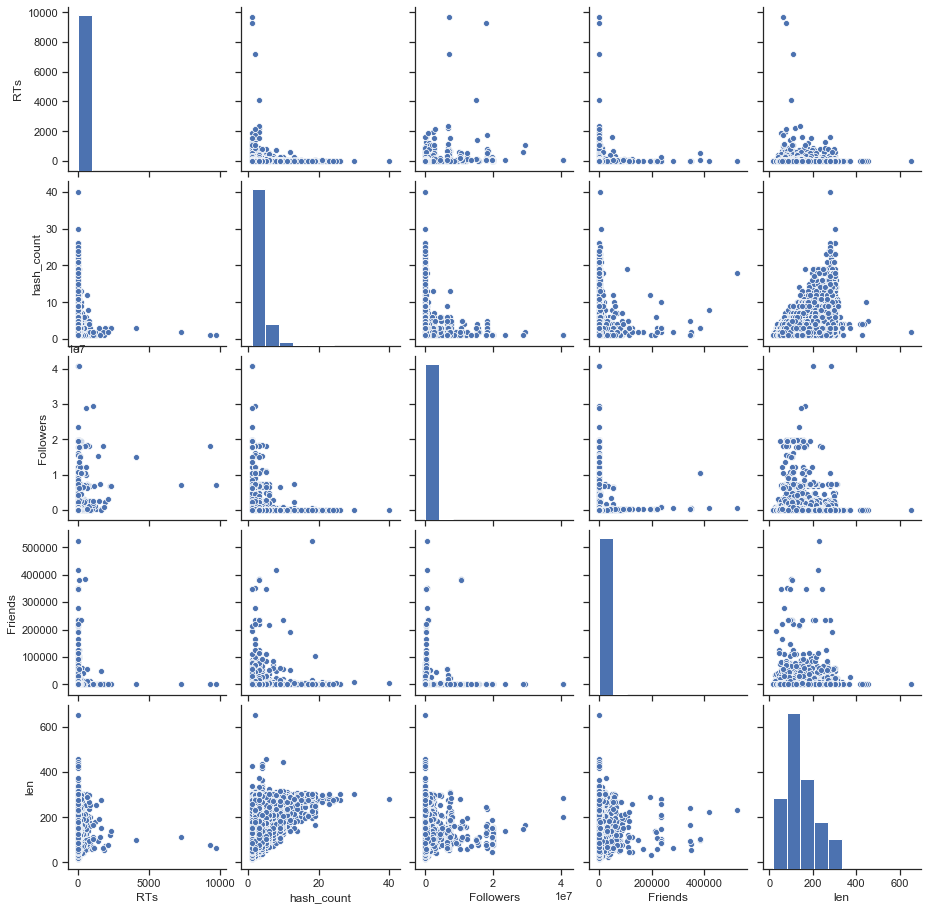

In [23]:
fifa_df_pred = fifa_df
fifa_df_pred['hash_count'] = fifa_df_pred.Hashtags.apply(lambda x : len(str(x).split(',')))
fifa_df_pred = fifa_df[["RTs","hash_count","Followers","Friends","len"]]
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(fifa_df_pred)
plt.show()